In [ ]:
!pip install -U mne
import mne

from google.colab import files
import os
import glob
import numpy as np
import mne
import matplotlib.pyplot as plt
from google.colab import drive
import scipy.stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from mne.filter import filter_data
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import svm
from sklearn import metrics
from scipy import signal


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Data - Channels: C3,C4**

In [ ]:
##Making Raw Input Data

###Reading Files

drive.mount('/content/drive')
raw_data_temp_right_left=[]
raw_data_temp_no_movement=[]

raw_labels_right_left=[]
raw_labels_no_movement=[]

from google.colab import drive


# Making an array of the names of all the required files
file_names = ['B0101T.gdf','B0102T.gdf','B0201T.gdf', 'B0202T.gdf', 'B0301T.gdf', 'B0302T.gdf', 'B0401T.gdf', 'B0402T.gdf', 'B0501T.gdf', 'B0502T.gdf', 'B0601T.gdf', 'B0602T.gdf', 'B0701T.gdf', 'B0702T.gdf', 'B0801T.gdf', 'B0802T.gdf', 'B0901T.gdf', 'B0902T.gdf']
#file_names = ['B0301T.gdf', 'B0302T.gdf'] 
 
# ---

#dir='/content/gdrive/My Drive/Dataset/BCICIV_2b_gdf/'
#root_dir = "/content/gdrive/My Drive/"

dir='/content/drive/MyDrive/Dataset/BCICIV_2b_gdf'


for file_name in file_names:

  # Step 1: Reading file from Google Drive
  file_location = os.path.join(dir,file_name)
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)
  # ---

  # Step 2: Getting data from file's object
  file_raw_data=file_gdf_obj.get_data()
  # ---

  # Step 3: Reading the data for required events
  events, event_ids = mne.events_from_annotations(file_gdf_obj)
  print("Events",np.shape(events))
  print("Events Ids",event_ids)

  events_targets = {key: event_ids[key] for key in event_ids.keys() & {'769','770'}}
  print("Events Ids",events_targets)


  tmin_right_left, tmax_right_left = 0, 4  		# define epochs around events (in s)
  tmin_no_movement, tmax_no_movement = 4, 5.5  		# define epochs around events (in s)

  epochs_right_left = mne.Epochs(file_gdf_obj, 
                                 events, 
                                 events_targets, 
                                 tmin_right_left, 
                                 tmax_right_left, 
                                 baseline=None, 
                                 preload=True, 
                                 event_repeated='merge', 
                                 picks= ['EEG:C3', 'EEG:C4'])
  
  epochs_no_movement = mne.Epochs(file_gdf_obj, 
                                  events, 
                                  events_targets, 
                                  tmin_no_movement, 
                                  tmax_no_movement, 
                                  baseline=None, 
                                  preload=True, 
                                  event_repeated='merge', 
                                  picks= ['EEG:C3', 'EEG:C4'])

  raw_data_temp_right_left.append(epochs_right_left.get_data())
  raw_data_temp_no_movement.append(epochs_no_movement.get_data())
  # ---


  raw_labels_right_left.append(epochs_right_left.events[:,2]-epochs_right_left.event_id['769']+1)
  raw_labels_no_movement.append(3*np.ones(len(epochs_no_movement)))
  # ---


X_raw_right_left = np.concatenate(raw_data_temp_right_left, axis = 0)
X_raw_no_movement = np.concatenate(raw_data_temp_no_movement, axis = 0) 

Y_raw_right_left = np.concatenate(raw_labels_right_left, axis = 0)
Y_raw_no_movement = np.concatenate(raw_labels_no_movement, axis = 0)

print("Shape of X_raw_right_left", np.shape(X_raw_right_left))
print("Shape of X_raw_no_movement", np.shape(X_raw_no_movement))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0101T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...


<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Reading 0 ... 604802  =      0.000 ...  2419.208 secs...
Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (271, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0102T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '32766', '768', '769', '770']
Events (268, 3)
Events Ids {'1023': 1, '32766': 2, '768': 3, '769': 4, '770': 5}
Events Ids {'770': 5, '769': 4}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0201T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (275, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0202T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (273, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0301T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (283, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0302T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (285, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0401T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (256, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0402T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (305, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
140 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 140 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
140 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 140 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0501T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (270, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0502T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (298, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
140 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 140 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
140 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 140 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0601T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (297, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0602T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (288, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0701T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (266, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0702T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (262, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0801T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (363, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 160 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 160 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0802T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (283, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0901T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (282, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Dataset/BCICIV_2b_gdf/B0902T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating r

<ipython-input-3-d56911900fe3>:31: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  file_gdf_obj = mne.io.read_raw_gdf(file_location, preload = True)


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Events (282, 3)
Events Ids {'1023': 1, '1077': 2, '1078': 3, '1079': 4, '1081': 5, '276': 6, '277': 7, '32766': 8, '768': 9, '769': 10, '770': 11}
Events Ids {'770': 11, '769': 10}
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 376 original time points ...
0 bad epochs dropped
Shape of X_raw_right_left (2240, 2, 1001)
Shape of X_raw_no_movement (2240, 2, 376)


*  **STFT + Band Selection + magnitude of Complex Numbers**
*  **Normalization (Standard Scaling)**

In [ ]:

##	STFT
f, t, Zxx_right_left = signal.stft(X_raw_right_left, fs=250, window='hann', nperseg=250, noverlap=100)
f, t, Zxx_no_movement = signal.stft(X_raw_no_movement, fs=250, window='hann', nperseg=250, noverlap=232)


##	Select Freq bands and take magnitude of complex numbers
Zxx_right_left_C3_mag = np.abs(Zxx_right_left[:,0,4:15,:])
Zxx_right_left_C4_mag = np.abs(Zxx_right_left[:,1,4:15,:])

Zxx_no_movement_C3_mag = np.abs(Zxx_no_movement[:,0,4:15,:])
Zxx_no_movement_C4_mag = np.abs(Zxx_no_movement[:,1,4:15,:])


print("Shape of Zxx_right_left_C3_magnitude:", np.shape(Zxx_right_left_C3_mag))
print("Shape of Zxx_right_left_C4_magnitude:", np.shape(Zxx_right_left_C4_mag))

print("Shape of Zxx_no_movement_C3_magnitude:", np.shape(Zxx_no_movement_C3_mag))
print("Shape of Zxx_no_movement_C4_magnitude:", np.shape(Zxx_no_movement_C4_mag))


##	Normalization
scaler = StandardScaler()

X_right_left_C3_scale=[]
X_right_left_C4_scale=[]

for i in range(len(Zxx_right_left_C3_mag)):
	X_right_left_C3_scale.append(np.float16(scaler.fit_transform(Zxx_right_left_C3_mag[i])))
	X_right_left_C4_scale.append(np.float16(scaler.fit_transform(Zxx_right_left_C4_mag[i])))

X_no_movement_C3_scale=[]
X_no_movement_C4_scale=[]

for i in range(len(Zxx_no_movement_C3_mag)):
	X_no_movement_C3_scale.append(np.float16(scaler.fit_transform(Zxx_no_movement_C3_mag[i])))
	X_no_movement_C4_scale.append(np.float16(scaler.fit_transform(Zxx_no_movement_C4_mag[i])))



Shape of Zxx_right_left_C3_magnitude: (2240, 11, 8)
Shape of Zxx_right_left_C4_magnitude: (2240, 11, 8)
Shape of Zxx_no_movement_C3_magnitude: (2240, 11, 22)
Shape of Zxx_no_movement_C4_magnitude: (2240, 11, 22)


**Combine C3 and C4 channels **

In [ ]:
my_X_right_left=[]
my_X_no_movement=[]

my_X_right_left = np.hstack((X_right_left_C3_scale, X_right_left_C4_scale))
my_X_no_movement = np.hstack((X_no_movement_C3_scale, X_no_movement_C4_scale))
  
  
print(np.shape(my_X_right_left))
print(np.shape(my_X_no_movement))



(2240, 22, 8)
(2240, 22, 22)


**Resizing data to 14x14**

**Combine Right/Left and No_Movement Data**

In [ ]:
# for resizing

X_right_left_after_resize = np.resize(my_X_right_left, (len(my_X_right_left), 224, 224))

# Resizing of No_Movement 
X_no_movement_after_resize = np.resize(my_X_no_movement, (len(my_X_no_movement), 224, 224))


X_temp = np.concatenate((X_right_left_after_resize, X_no_movement_after_resize))

print("Shape of X_temp:",np.shape(X_temp))

Shape of X_temp: (4480, 224, 224)


**Convert to 3 channels by copying **

In [ ]:
X_Copy1 = X_temp
X_Copy2 = X_temp
X_Copy3 = X_temp

X=[]
for i in range(len(X_temp)):
  temp = np.dstack((X_Copy1[i],X_Copy2[i],X_Copy3[i]))

  X.append(temp)
  
X=np.array(X)
print("Shape of Final X:", np.shape(X))

Shape of Final X: (4480, 224, 224, 3)


**Make vector of labels (Y)**

In [ ]:
def making_vector_labels(movement_class):
  output = []
  if movement_class == 1:
    output.append([1,0,0])
  elif movement_class == 2:
    output.append([0,1,0])
  elif movement_class == 3:
    output.append([0,0,1])
  return np.concatenate(output, axis = 0)


test_Y = np.concatenate((Y_raw_right_left, Y_raw_no_movement))

Y = np.array(list(map(making_vector_labels, test_Y)))
print("Shape of Y:",np.shape(Y))

Shape of Y: (4480, 3)


In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**EfficientNet Model**

In [ ]:

import efficientnet.keras as efn
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False


x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.Dense(3, activation='softmax')(x)
# Add a final sigmoid layer with 1 node for classification output
#x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)


16804768/16804768 [==============================] - 1s 0us/step


In [ ]:
# Get the model summary

model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                             

In [ ]:
#model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss='binary_crossentropy',metrics=['accuracy'])
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configure the model for training with "Adam" and "Mean Square Error (MSE)" as loss function
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
#model.compile(optimizer = RMSprop(lr=0.0001,decay=1e-6), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=1, shuffle=True)

print("After Splitting:")
print("Length of Training Data:",len(X_train))
print("Length of Testing Data:",len(X_test))

After Splitting:
Length of Training Data: 4032
Length of Testing Data: 448


In [ ]:

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), shuffle= True)
#eff_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),  steps_per_epoch = 100,epochs = 10)
#model_history = model.fit(x=X_train, y=y_train, steps_per_epoch=len(train_dataset), epochs=3, validation_data=(X_test, y_test), validation_steps=len(test_dataset))  
print("Training Accuracy (Mean):", np.mean(history.history['accuracy']))
print("Validation Accuracy(Mean):", np.mean(history.history['val_accuracy']))

print("Training Accuracy (Max):", np.amax(history.history['accuracy']))
print("Validation Accuracy(Max):", np.amax(history.history['val_accuracy']))

Epoch 1/10
126/126 [==============================] - 332s 3s/step - loss: 0.0879 - accuracy: 0.7649 - val_loss: 0.0840 - val_accuracy: 0.7612
Epoch 2/10
126/126 [==============================] - 319s 3s/step - loss: 0.0887 - accuracy: 0.7602 - val_loss: 0.0868 - val_accuracy: 0.7567
Epoch 3/10
126/126 [==============================] - 294s 2s/step - loss: 0.0929 - accuracy: 0.7510 - val_loss: 0.0879 - val_accuracy: 0.7679
Epoch 4/10
126/126 [==============================] - 297s 2s/step - loss: 0.0879 - accuracy: 0.7589 - val_loss: 0.0883 - val_accuracy: 0.7522
Epoch 5/10
126/126 [==============================] - 288s 2s/step - loss: 0.0866 - accuracy: 0.7636 - val_loss: 0.0880 - val_accuracy: 0.7433
Epoch 6/10
126/126 [==============================] - 291s 2s/step - loss: 0.0871 - accuracy: 0.7674 - val_loss: 0.0887 - val_accuracy: 0.7567
Epoch 7/10
126/126 [==============================] - 294s 2s/step - loss: 0.0869 - accuracy: 0.7634 - val_loss: 0.0905 - val_accuracy: 0.7455

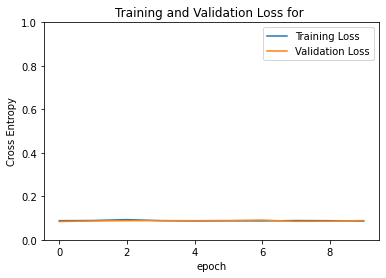

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
#plt.title('Training Loss for '+per)
plt.title('Training and Validation Loss for ')
plt.xlabel('epoch')
plt.show()

In [ ]:
#	Generate ResNet50 model

model = ResNet50_Model()



# Get the model summary

model.summary()

**Classification - ResNet50 Model**

In [ ]:
def ResNet50_Model():



  from tensorflow.keras.applications import ResNet50

  from tensorflow.keras import layers, models

  import tensorflow as tf

  from tensorflow import keras

  

  model = models.Sequential()

  convn_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

  

  # convert all the layer's weights to trainable 

  convn_base.trainable = False

  

  #	Add ResNet50 Model

  model.add(convn_base)

  

  #	Flatten the inputs

  model.add(layers.Flatten())

  

  # Add Dropout Layer

  model.add(layers.Dropout(0.5))

  

  #Add Batch Normalization Layer

  model.add(layers.BatchNormalization(momentum=0.9))



  #	Add Softmax Layer

  model.add(layers.Dense(3, activation='softmax'))

  

  return model


In [ ]:
#	Generate ResNet50 model

model = ResNet50_Model()



# Get the model summary

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 23,602,051
Trainable params: 10,243
Non-trainable params: 23,591,808
_____________________________________

In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configure the model for training with "Adam" and "Mean Square Error (MSE)" as loss function
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

**Spliting into Train/Test for training/validation**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True)

print("After Splitting:")
print("Length of Training Data:",len(X_train))
print("Length of Testing Data:",len(X_test))


After Splitting:
Length of Training Data: 3584
Length of Testing Data: 896


In [ ]:

#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), shuffle= True)
eff_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), steps_per_epoch = 100, epochs = 10)
  
print("Training Accuracy (Mean):", np.mean(history.history['accuracy']))
print("Validation Accuracy(Mean):", np.mean(history.history['val_accuracy']))

print("Training Accuracy (Max):", np.amax(history.history['accuracy']))
print("Validation Accuracy(Max):", np.amax(history.history['val_accuracy']))

Epoch 1/10


ValueError: ignored

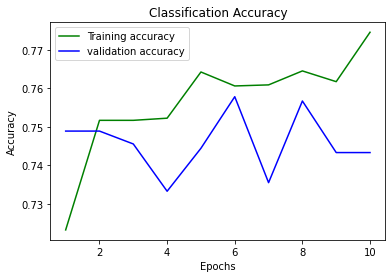

In [ ]:
import matplotlib.pyplot as plt 
loss_train = [77.1,78.25,79.3,81.5,82.34,83.23,84.21,85.24,86.27]
loss_val = [77.1,78.25,79.3,81.5,82.34,83.23,84.21,85.24,86.27]
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

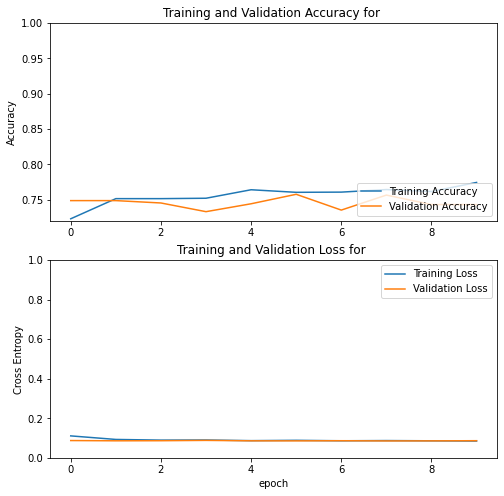

In [ ]:
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy for ')
  #plt.title('Training Accuracy for '+per)

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,1.0])
  #plt.title('Training Loss for '+per)
  plt.title('Training and Validation Loss for ')
  plt.xlabel('epoch')
  plt.show()

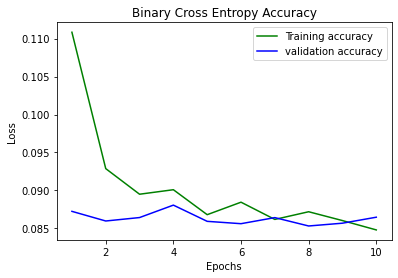

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Binary Cross Entropy Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Using 10-Fold Cross Validation Method**

In [ ]:
cv = KFold(random_state=1, shuffle=True, n_splits=10)
temp_mean=[]
temp_mean_val =[]

for train_index, test_index in cv.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  
  # Train the model and validate
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), shuffle=True)
  
  print("Training Accuracy (Mean):", np.mean(history.history['accuracy']))
  print("Validation Accuracy(Mean):", np.mean(history.history['val_accuracy']))
  print("Training Accuracy (Max):", np.amax(history.history['accuracy']))
  print("Validation Accuracy(Max):", np.amax(history.history['val_accuracy']))



NameError: ignored

**End of Resnet50 Model**

**Classification: CNN Model**

In [ ]:
def Generate_CNN_Model():
  from tensorflow.keras.applications import ResNet50
  from tensorflow.keras import layers, models
  import tensorflow as tf
  from tensorflow import keras

	# Generate sequential model
  model = keras.Sequential()

	#convolutional layer
  model.add(layers.Conv2D(104, (16,16), strides=2, activation='relu', input_shape=(150,150,3)))

	#max pooling layer
  model.add(layers.MaxPooling2D((2,2)))

	#convolutional layer 
  model.add(layers.Conv2D(128, (4,4), activation='relu'))

	#max pooling layer
  model.add(layers.MaxPooling2D((2,2)))

	#convolutional layer
  model.add(layers.Conv2D(64, (2,2), activation='relu'))

	#max pooling layer
  model.add(layers.MaxPooling2D((2,2)))


	##	Dropout Layer
  model.add(layers.Dropout(0.5))

	#model.add(layers.BatchNormalization(momentum=0.9))
 
	#Flatten the inputs
  model.add(layers.Flatten())


	#softmax layer
  model.add(layers.Dense(3, activation='softmax'))
  return model

In [ ]:
model = Generate_CNN_Model()

# Get the model summary
model.summary()

from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configure the model for training with "Adam" and "Mean Square Error (MSE)" as loss function
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 104)       79976     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 104)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 128)       213120    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

**Training using K-Fold Cross Validation**

In [ ]:
cv = KFold(random_state=1, shuffle=True, n_splits=10)

for train_index, test_index in cv.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = Y[train_index], Y[test_index]


	# Train the model and validate
	history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), shuffle=True)
	

print("Training Accuracy (Mean):", np.mean(history.history['accuracy']))
print("Validation Accuracy(Mean):", np.mean(history.history['val_accuracy']))
print("Training Accuracy (Max):", np.amax(history.history['accuracy']))
print("Validation Accuracy(Max):", np.amax(history.history['val_accuracy']))


Epoch 1/5
  3/126 [..............................] - ETA: 4:15 - loss: 0.2240 - accuracy: 0.4896

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-aa32eb1c530a>", line 9, in <module>
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), shuffle=True)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1384, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 915, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/tensorflo

KeyboardInterrupt: ignored

Training/Testing using 20% Testing/ 80% Training

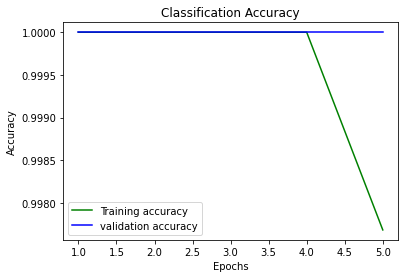

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True)

print("After Splitting:")
print("Length of Training Data:",len(X_train))
print("Length of Testing Data:",len(X_test))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), shuffle=True)

	  
print("Training Accuracy (Mean):", np.mean(history.history['accuracy']))
print("Validation Accuracy(Mean):", np.mean(history.history['val_accuracy']))

print("Training Accuracy (Max):", np.amax(history.history['accuracy']))
print("Validation Accuracy(Max):", np.amax(history.history['val_accuracy']))

After Splitting:
Length of Training Data: 3584
Length of Testing Data: 896
Epoch 1/10
112/112 [==============================] - 250s 2s/step - loss: 0.0996 - accuracy: 0.7377 - val_loss: 0.0849 - val_accuracy: 0.7467
Epoch 2/10
112/112 [==============================] - 247s 2s/step - loss: 0.0850 - accuracy: 0.7575 - val_loss: 0.0829 - val_accuracy: 0.7567
Epoch 3/10
112/112 [==============================] - 246s 2s/step - loss: 0.0856 - accuracy: 0.7586 - val_loss: 0.0828 - val_accuracy: 0.7489
Epoch 4/10
112/112 [==============================] - 247s 2s/step - loss: 0.0855 - accuracy: 0.7573 - val_loss: 0.0828 - val_accuracy: 0.7411
Epoch 5/10
112/112 [==============================] - 246s 2s/step - loss: 0.0837 - accuracy: 0.7617 - val_loss: 0.0836 - val_accuracy: 0.7467
Epoch 6/10
112/112 [==============================] - 249s 2s/step - loss: 0.0829 - accuracy: 0.7670 - val_loss: 0.0829 - val_accuracy: 0.7489
Epoch 7/10
112/112 [==============================] - 247s 2s/step 

KeyboardInterrupt: ignored

**End of CNN Model**

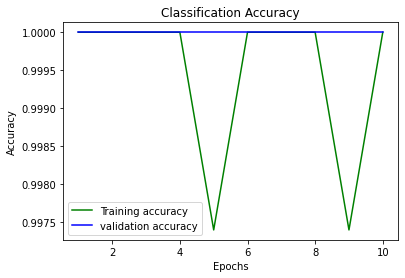

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()